# Data-Lab
This file is a place where experiments are perfomed. Here could be presented graphs, created prototype of solutions. One can find more or less well designed models and some ways to present their perfomence. 

No production-ready code should be found in here.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import scipy

## Loading data from files

In [2]:
products = pd.read_csv('../data/product_details.tsv', sep='\t')
users = pd.read_csv('../data/user_game_time.tsv', sep='\t')

f'Products: {len(products)}, Users: {len(users)}'

'Products: 1000, Users: 9622'

In [3]:
products.game_modes.unique()

array(['Single-player', 'Single-player,Co-op',
       'Single-player,Multi-player', 'Single-player,Multi-player,Co-op',
       'Multi-player,Co-op', nan], dtype=object)

In [4]:
users.head()

,user_id,game_id,game_time
0,0,889,0
1,0,914,5
2,0,551,236
3,0,847,290
4,0,135,379


In [5]:
def split_modes(modes: str) -> dict:
    result = {'Single-player': 0, 'Co-op': 0, 'Multi-player': 0}
    try:
        if modes.strip():  # Check if modes is not empty or None
            mode_list = modes.split(',')
            for mode in mode_list:
                if mode.strip() in result:
                    result[mode.strip()] = 1
    except AttributeError:
        # modes is None or not a string
        pass
    return result

In [6]:
products['game_modes'] = products['game_modes'].apply(lambda x: split_modes(x))
products = pd.concat([products.drop(columns='game_modes'), products['game_modes'].apply(pd.Series)], axis=1)
products

,id,title,series_id,genre_1_id,genre_2_id,genre_3_id,price,developer_id,publisher_id,tagline,Single-player,Co-op,Multi-player
0,1215594767,The Fold: Ingression,0,60,69,86,9999,14227,6170,NaN,1,0,0
1,1443160656,Falcon Gold,0,61,65,73,699,5433,8854,NaN,1,0,0
2,1584656762,B-17 Flying Fortress: Bombers in Action,0,61,70,74,899,15829,8854,NaN,1,0,0
3,1181317918,Brewpub Simulator,0,61,65,95,1799,10481,7751,NaN,1,0,0
4,1240322197,Stray Souls,0,60,69,86,2999,15421,1333,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1245136314,Ring of Pain Demo,0,56,221,103,0,11614,6857,NaN,1,0,0
996,2053196692,Elements,0,60,69,143,9999,12941,7180,NaN,1,0,0
997,1558393671,Hollow Knight: Silksong,0,87,64,133,9999,8063,4973,NaN,1,0,0
998,1584302429,Freight Tycoon Inc.,0,56,93,95,499,6823,6170,NaN,1,0,0


## Understanding the data

In [7]:
products['title'] = products['title'].astype('category').cat.codes
products['tagline'] = products['tagline'].astype('category').cat.codes

Not including columns: []


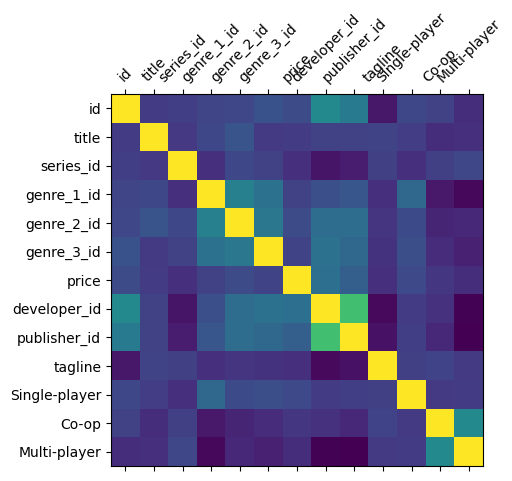

In [8]:
corr = products.corr()

print(f'Not including columns: {[column for column in products.columns if column not in corr.columns]}')

plt.matshow(corr)
plt.xticks(ticks=range(len(corr.columns)), labels=corr.columns, rotation=45)
plt.yticks(ticks=range(len(corr.columns)), labels=corr.columns)
plt.show()

Not including columns: []


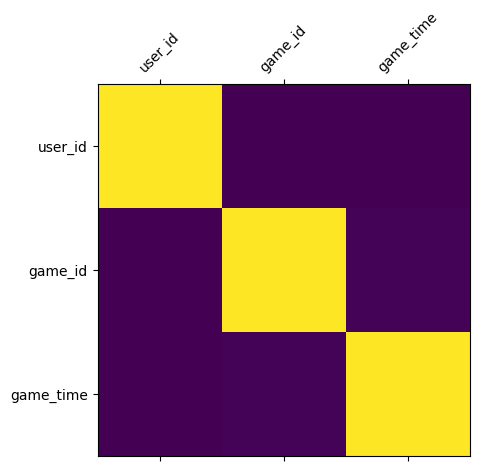

In [9]:
corr = users.corr()

print(f'Not including columns: {[column for column in users.columns if column not in corr.columns]}')

plt.matshow(corr)
plt.xticks(ticks=range(len(corr.columns)), labels=corr.columns, rotation=45)
plt.yticks(ticks=range(len(corr.columns)), labels=corr.columns)
plt.show()

In [10]:
def show_uniques_per_column(df: pd.DataFrame) -> None:
    for column in df.columns:
        print(f'Number of uniques of column "{column}": {len(df[column].unique())}')

In [11]:
show_uniques_per_column(products)

Number of uniques of column "id": 1000
Number of uniques of column "title": 1000
Number of uniques of column "series_id": 193
Number of uniques of column "genre_1_id": 9
Number of uniques of column "genre_2_id": 21
Number of uniques of column "genre_3_id": 35
Number of uniques of column "price": 40
Number of uniques of column "developer_id": 824
Number of uniques of column "publisher_id": 479
Number of uniques of column "tagline": 26
Number of uniques of column "Single-player": 2
Number of uniques of column "Co-op": 2
Number of uniques of column "Multi-player": 2


In [12]:
show_uniques_per_column(users)

Number of uniques of column "user_id": 878
Number of uniques of column "game_id": 998
Number of uniques of column "game_time": 1397


array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'title'}>,
        <AxesSubplot: title={'center': 'series_id'}>,
        <AxesSubplot: title={'center': 'genre_1_id'}>],
       [<AxesSubplot: title={'center': 'genre_2_id'}>,
        <AxesSubplot: title={'center': 'genre_3_id'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'developer_id'}>],
       [<AxesSubplot: title={'center': 'publisher_id'}>,
        <AxesSubplot: title={'center': 'tagline'}>,
        <AxesSubplot: title={'center': 'Single-player'}>,
        <AxesSubplot: title={'center': 'Co-op'}>],
       [<AxesSubplot: title={'center': 'Multi-player'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

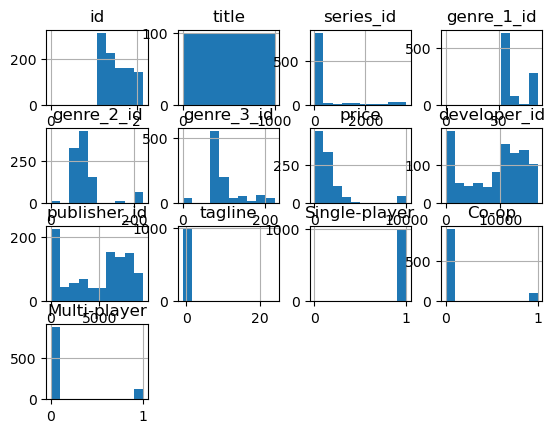

In [13]:
products.hist()

array([[<AxesSubplot: title={'center': 'user_id'}>,
        <AxesSubplot: title={'center': 'game_id'}>],
       [<AxesSubplot: title={'center': 'game_time'}>, <AxesSubplot: >]],
      dtype=object)

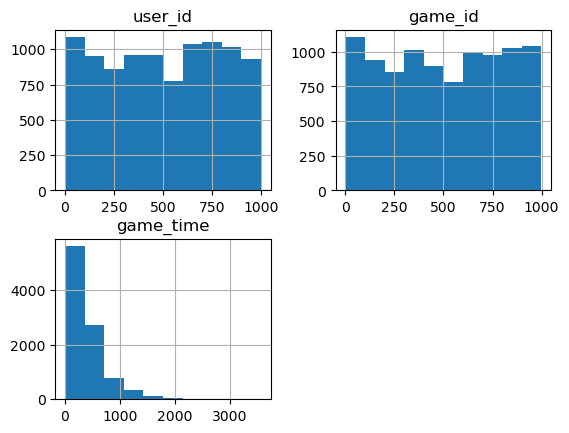

In [14]:
users.hist()

## Cosine Similarity approach
#### First of all let's merge users with the games they bought. It will present who bought which game and how much time one spend in every game. 

In [15]:
df = users.merge(products, left_on='game_id', right_on='id', how='right')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        12 non-null     float64
 1   game_id        12 non-null     float64
 2   game_time      12 non-null     float64
 3   id             1010 non-null   int64  
 4   title          1010 non-null   int16  
 5   series_id      1010 non-null   int64  
 6   genre_1_id     1010 non-null   int64  
 7   genre_2_id     1010 non-null   int64  
 8   genre_3_id     1010 non-null   int64  
 9   price          1010 non-null   int64  
 10  developer_id   1010 non-null   int64  
 11  publisher_id   1010 non-null   int64  
 12  tagline        1010 non-null   int8   
 13  Single-player  1010 non-null   int64  
 14  Co-op          1010 non-null   int64  
 15  Multi-player   1010 non-null   int64  
dtypes: float64(3), int16(1), int64(11), int8(1)
memory usage: 121.3 KB


#### So it appeares there are only 12 games that was accually bought. 

#### Next step then is to drop empty records, since it is important to know why said games were bought.

In [17]:
# Most of game_ids don't matches ids numbers from products dataframe 
# (I assume with real data, things would go different) 

df = df.fillna(0)

In [18]:
df

,user_id,game_id,game_time,id,title,series_id,genre_1_id,genre_2_id,genre_3_id,price,developer_id,publisher_id,tagline,Single-player,Co-op,Multi-player
0,0.0,0.0,0.0,1215594767,818,0,60,69,86,9999,14227,6170,-1,1,0,0
1,0.0,0.0,0.0,1443160656,282,0,61,65,73,699,5433,8854,-1,1,0,0
2,0.0,0.0,0.0,1584656762,79,0,61,70,74,899,15829,8854,-1,1,0,0
3,0.0,0.0,0.0,1181317918,117,0,61,65,95,1799,10481,7751,-1,1,0,0
4,0.0,0.0,0.0,1240322197,754,0,60,69,86,2999,15421,1333,-1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,0.0,0.0,0.0,1245136314,642,0,56,221,103,0,11614,6857,-1,1,0,0
1006,0.0,0.0,0.0,2053196692,260,0,60,69,143,9999,12941,7180,-1,1,0,0
1007,0.0,0.0,0.0,1558393671,365,0,87,64,133,9999,8063,4973,-1,1,0,0
1008,0.0,0.0,0.0,1584302429,306,0,56,93,95,499,6823,6170,-1,1,0,0


#### Now, let's aggregate data. 
#### Goal is to figure out what are each customer's preferences. In order to do so it is neccessery to represent each user by his "dream game".  Then we can find the most similar game in store.

In [19]:
# Okay, so as is shown on the 

users = df.groupby('user_id').agg(
    most_freq_series=('series_id', pd.Series.mode),
    most_freq_genre_1=('genre_1_id', pd.Series.mode),
    most_freq_genre_2=('genre_2_id', pd.Series.mode),
    most_freq_genre_3=('genre_3_id', pd.Series.mode),
    most_freq_dev=('developer_id', pd.Series.mode),
    most_freq_pub=('publisher_id', pd.Series.mode),
    avg_price=('price', 'mean'),
    avg_single_mode=('Single-player', 'mean'),
    avg_coop_mode=('Co-op', 'mean'),
    avg_multi_mode=('Multi-player', 'mean')
)

In [20]:
# This code is maybe not so neccessery, since 'id' column is unique. Every game will have mode/mean of 1 record,
# but it is the fastest way to ensure users and products will be desribed by the same values

products = products.groupby('id').agg(
    most_freq_series=('series_id', pd.Series.mode),
    most_freq_genre_1=('genre_1_id', pd.Series.mode),
    most_freq_genre_2=('genre_2_id', pd.Series.mode),
    most_freq_genre_3=('genre_3_id', pd.Series.mode),
    most_freq_dev=('developer_id', pd.Series.mode),
    most_freq_pub=('publisher_id', pd.Series.mode),
    avg_price=('price', 'mean'),
    avg_single_mode=('Single-player', 'mean'),
    avg_coop_mode=('Co-op', 'mean'),
    avg_multi_mode=('Multi-player', 'mean')
)

#### Using cosine similiarity distance and KNN algorithmwe can determine which products recommend

In [21]:
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors

In [22]:
knn = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='cosine')
knn.fit(products)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [23]:
user_id = 98
distances, indices = knn.kneighbors(users.values)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [24]:
indices = indices.reshape(-1)

products.reset_index(inplace=True)

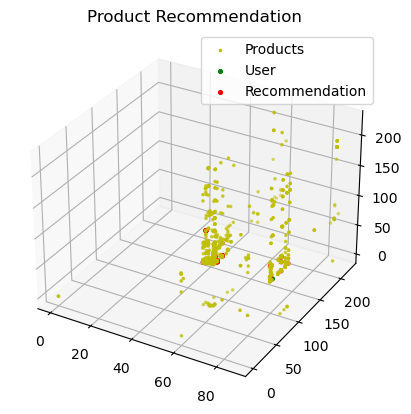

In [31]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(
    products['most_freq_genre_1'], 
    products['most_freq_genre_2'], 
    products['most_freq_genre_3'],
    marker='.',
    c='y',
    s=10,
    label='Products'
        )
ax.scatter(
    users['most_freq_genre_1'], 
    users['most_freq_genre_2'], 
    users['most_freq_genre_3'],
    marker='.',
    c='g',
    s=30,
    label='User'
        )
ax.scatter(
    products['most_freq_genre_1'].loc[indices], 
    products['most_freq_genre_2'].loc[indices], 
    products['most_freq_genre_3'].loc[indices],
    marker='.',
    c='r',
    s=30,
    label='Recommendation'
        )
plt.title('Product Recommendation')
plt.legend()
# ax.set_xlim(30, 50)
# ax.set_ylim(110, 140)
# ax.set_zlim(0, 40)
plt.show()

In [29]:
mean_similarity = distances.mean()

In [30]:
mean_similarity

0.0015727749917883334

In [33]:
from typing import List, Tuple

def get_recommendations(user_id) -> List[Tuple[int, float]]:
    user_input = users.loc[user_id].values.reshape(1, -1)
    distances, indices = knn.kneighbors(user_input)
    distances, indices = distances.reshape(-1), indices.reshape(-1)
    return [(int(indices[i]), float(distances[i])) for i in range(len(indices))]

In [34]:
get_recommendations(9)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


[(0, 0.0),
 (222, 0.00042291412274719775),
 (1, 0.000726548972268426),
 (223, 0.0007536516158245243),
 (92, 0.0008206872484596284),
 (93, 0.0008559051977174992),
 (94, 0.0009315600128964041),
 (109, 0.0018192880253067312),
 (185, 0.003124609431185754),
 (113, 0.0034449729522332273)]